# Exploring the Titanic Disaster Using Data
Beth Spornitz
September 23, 2024

This code uses a combination of Python and Markdown to create an initial data story of the sinking of the Titanic.  Class, Sex, Parental Status, and Age will all be explored in relation to survival.

Specific to the titanic dataset, this file will walk through how to perform these functions:
1.  Data Acquisition
2.  Initial Data Inspection
3.  Initial Descriptive Statistics
4.  Initial Data Distribution for Numerical Columns
5.  Initial Data Distribution for Categorical Columns
6.  Initial Data Preparation (or Data Preprocessing)
7.  Initial Visualizations
8.  Initial Storytelling and Presentation

These steps will be followed by visulations and explanations of visualizations.

### Import Dependencies

In [551]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Data Acquisition

In [552]:
# Load the Titanic dataset into DataFrame
df = sns.load_dataset('titanic')

# Inspect first rows of the DataFrame
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Initial Data Inspection

In [553]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

### Initial Descriptive Statistics

In [554]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


##### Observations  
We can see right off that around 38% of the Titanic passengers survived.  We can also see that the average age was 29 years old.

### Initial Data Distribution for Numerical Columns

##### Pair Plot for Age, Fare, and Survived

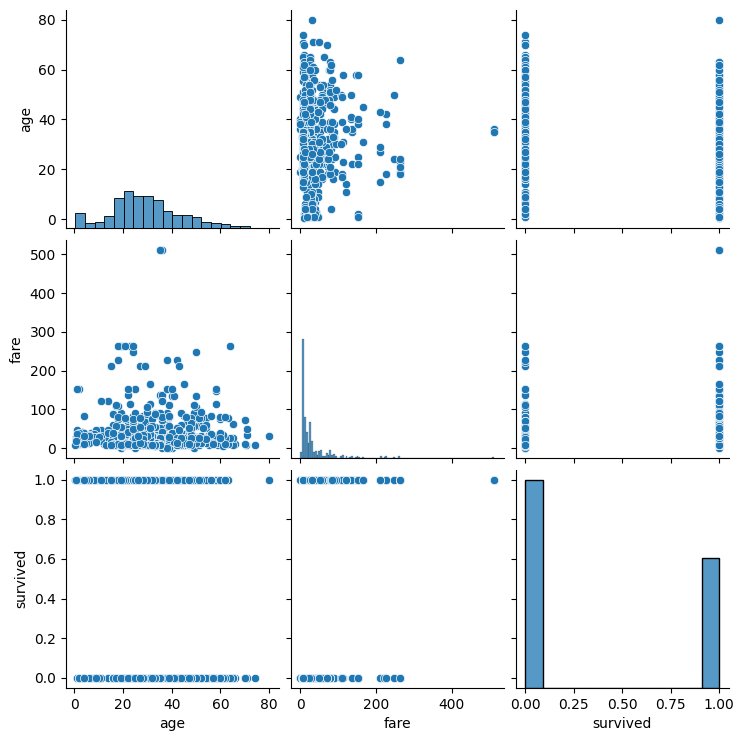

In [555]:
sns.pairplot(df[['age', 'fare', 'survived']])
plt.show()

##### Observations
The age, fare, and survived pair plot demonstrates immediately that more people died than survived the disaster.

##### Density Plots
This first density plot is based on age alone.

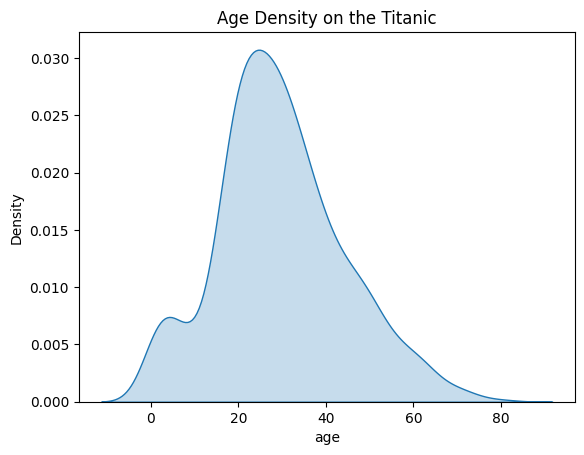

In [556]:
sns.kdeplot(df['age'], fill=True)
plt.title('Age Density on the Titanic')
plt.xlabel('age')
plt.ylabel('Density')
plt.show()

##### Observations
The age density plot is showing that most passengers were between the ages of 20 and 40.

This density plot combined age with passenger class.

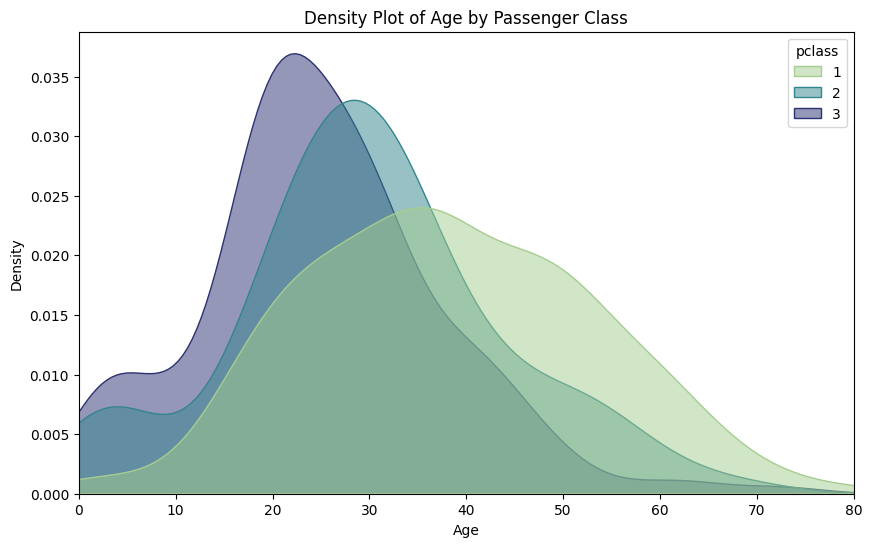

In [557]:
# Create a density plot for Age by Passenger Class
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='pclass', fill=True, common_norm=False, alpha=0.5, palette='crest')

# Customize the plot
plt.title('Density Plot of Age by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xlim(0, df['age'].max())  # Limit x-axis to the max age in the dataset

plt.show()

##### Observations  
The density plot of age by passenger class illistrates the following:    
-There were more 3rd class passengers than 1st or 2nd class, and there were more 2nd class passengers than there were 1st class passenger.  
-The 3rd class passengers were generally younger than those in 2nd class and 1st clss.  


#### Initial Data Distribution for Categorical Columns

Value counts for column: sex
sex
male      577
female    314
Name: count, dtype: int64



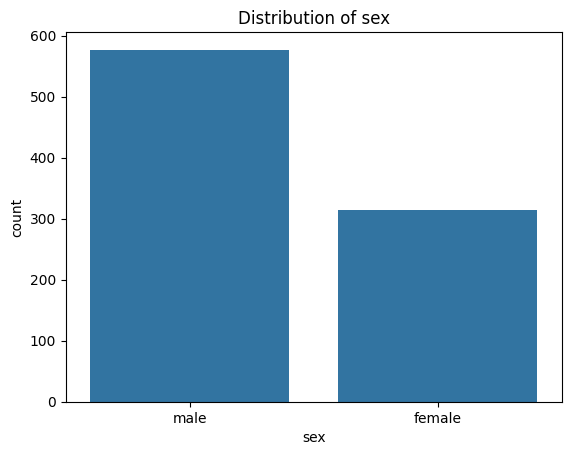

Value counts for column: embarked
embarked
S    644
C    168
Q     77
Name: count, dtype: int64



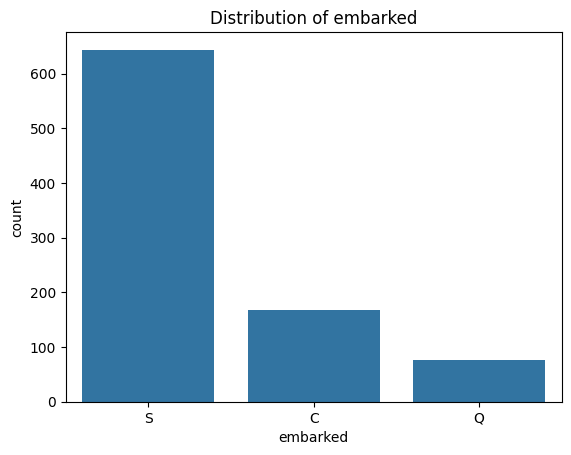

Value counts for column: class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



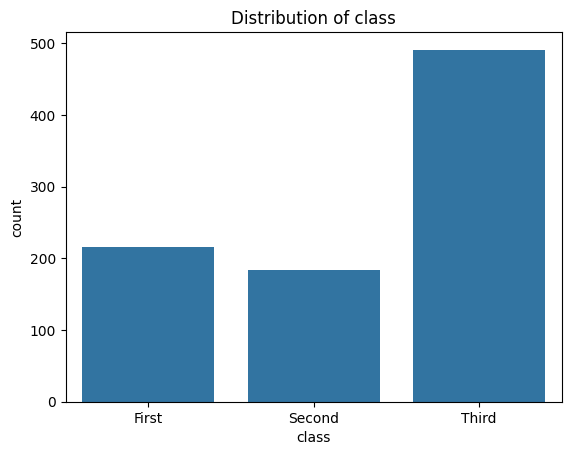

Value counts for column: who
who
man      537
woman    271
child     83
Name: count, dtype: int64



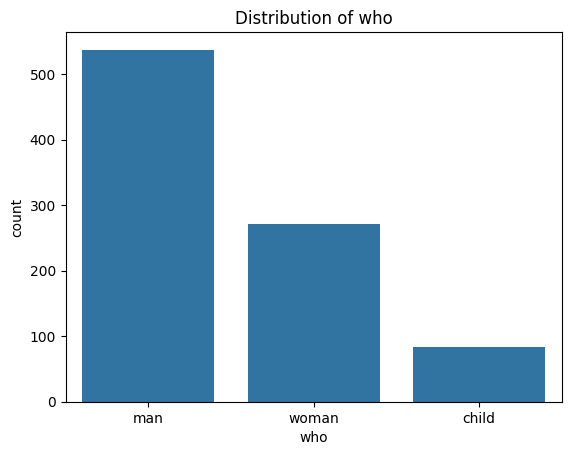

Value counts for column: deck
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64



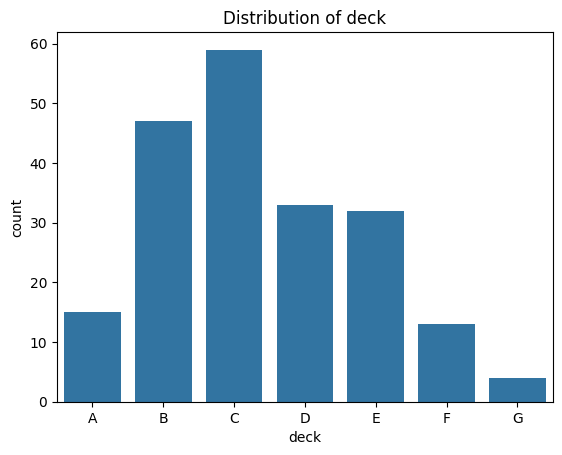

Value counts for column: embark_town
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64



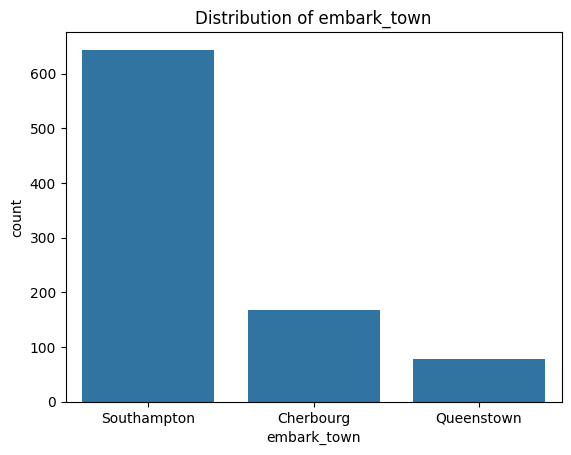

Value counts for column: alive
alive
no     549
yes    342
Name: count, dtype: int64



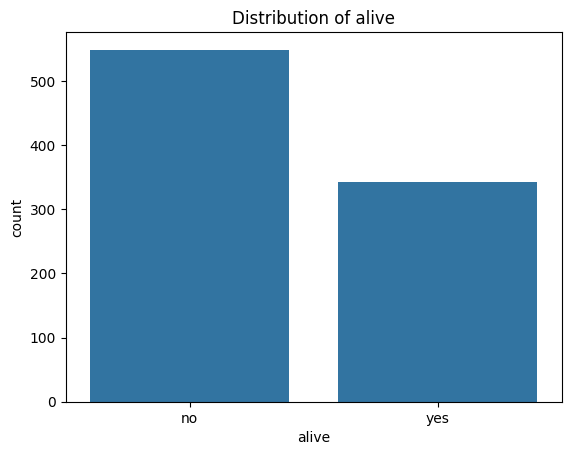

In [558]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f'Value counts for column: {col}')
    print(df[col].value_counts())
    print()
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

##### Observations    

From these initial categorical column investigations, we can tell several things:  
1.  More people died on the titanic than survived.  
2.  More passengers embarked in Southamton than Queenstown or Cherbourg. 
3.  Deck C held the housed the most passengers.  
4.  The third class passengers make up the bulk of the passengers. 
5.  There were many more male passengers than female passengers.

#### Initial Data Transformation and Feature Engineering

In [559]:
# Define a dictionary mapping old column names to new names
new_column_names = {
    'pclass': 'Passenger Class',
    'sex': 'Sex',
    'age': 'Age',
    'sibsp': 'Siblings/Spouses Aboard',
    'parch': 'Parents/Children Aboard',
    'fare': 'Fare Amount',
    'survived': 'Survival Status'
}

# Rename the columns in the DataFrame using the dictionary
df.rename(columns=new_column_names, inplace=True)

# Display the updated DataFrame column names to verify the changes
print(df.columns)

# Adding new columns for family size and total fare
df['Family Size'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1  # Include the passenger
df['Fare Per Person'] = df['Fare Amount'] / df['Family Size']

# Display the first few rows of the updated DataFrame to verify the changes
print(df.head())

Index(['Survival Status', 'Passenger Class', 'Sex', 'Age',
       'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare Amount',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
   Survival Status  Passenger Class     Sex   Age  Siblings/Spouses Aboard  \
0                0                3    male  22.0                        1   
1                1                1  female  38.0                        1   
2                1                3  female  26.0                        0   
3                1                1  female  35.0                        1   
4                0                3    male  35.0                        0   

   Parents/Children Aboard  Fare Amount embarked  class    who  adult_male  \
0                        0       7.2500        S  Third    man        True   
1                        0      71.2833        C  First  woman       False   
2                        0       7.9250   

### Initial Data Visualization

##### Scatterplot of Age vs. Fare and Survival

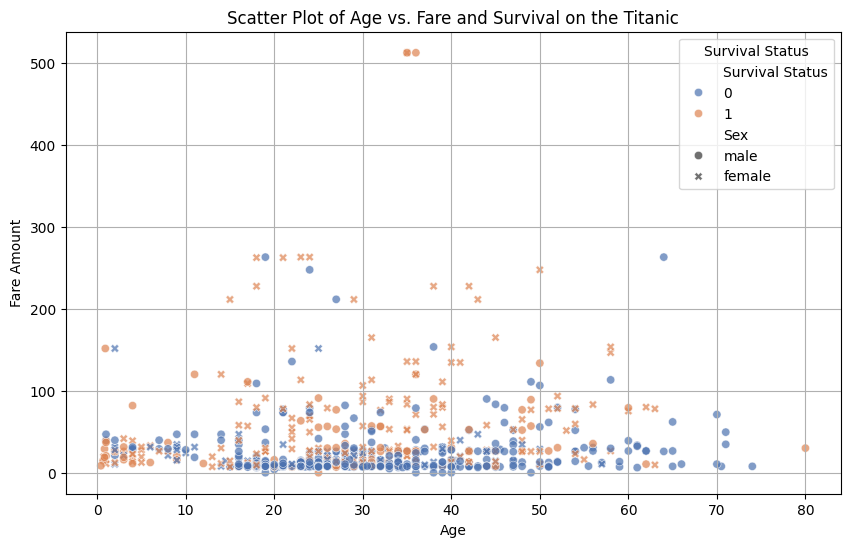

In [560]:
# Set up the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare Amount', hue='Survival Status', style='Sex', palette='deep', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Age vs. Fare and Survival on the Titanic')
plt.xlabel('Age')
plt.ylabel('Fare Amount')
plt.legend(title='Survival Status')
plt.grid()

# Show the plot
plt.show()

##### Observataions
At a glance the scatterplot shows that more women survived than men and the two passengers paying the highest fair also survived.

#### Pair Plot

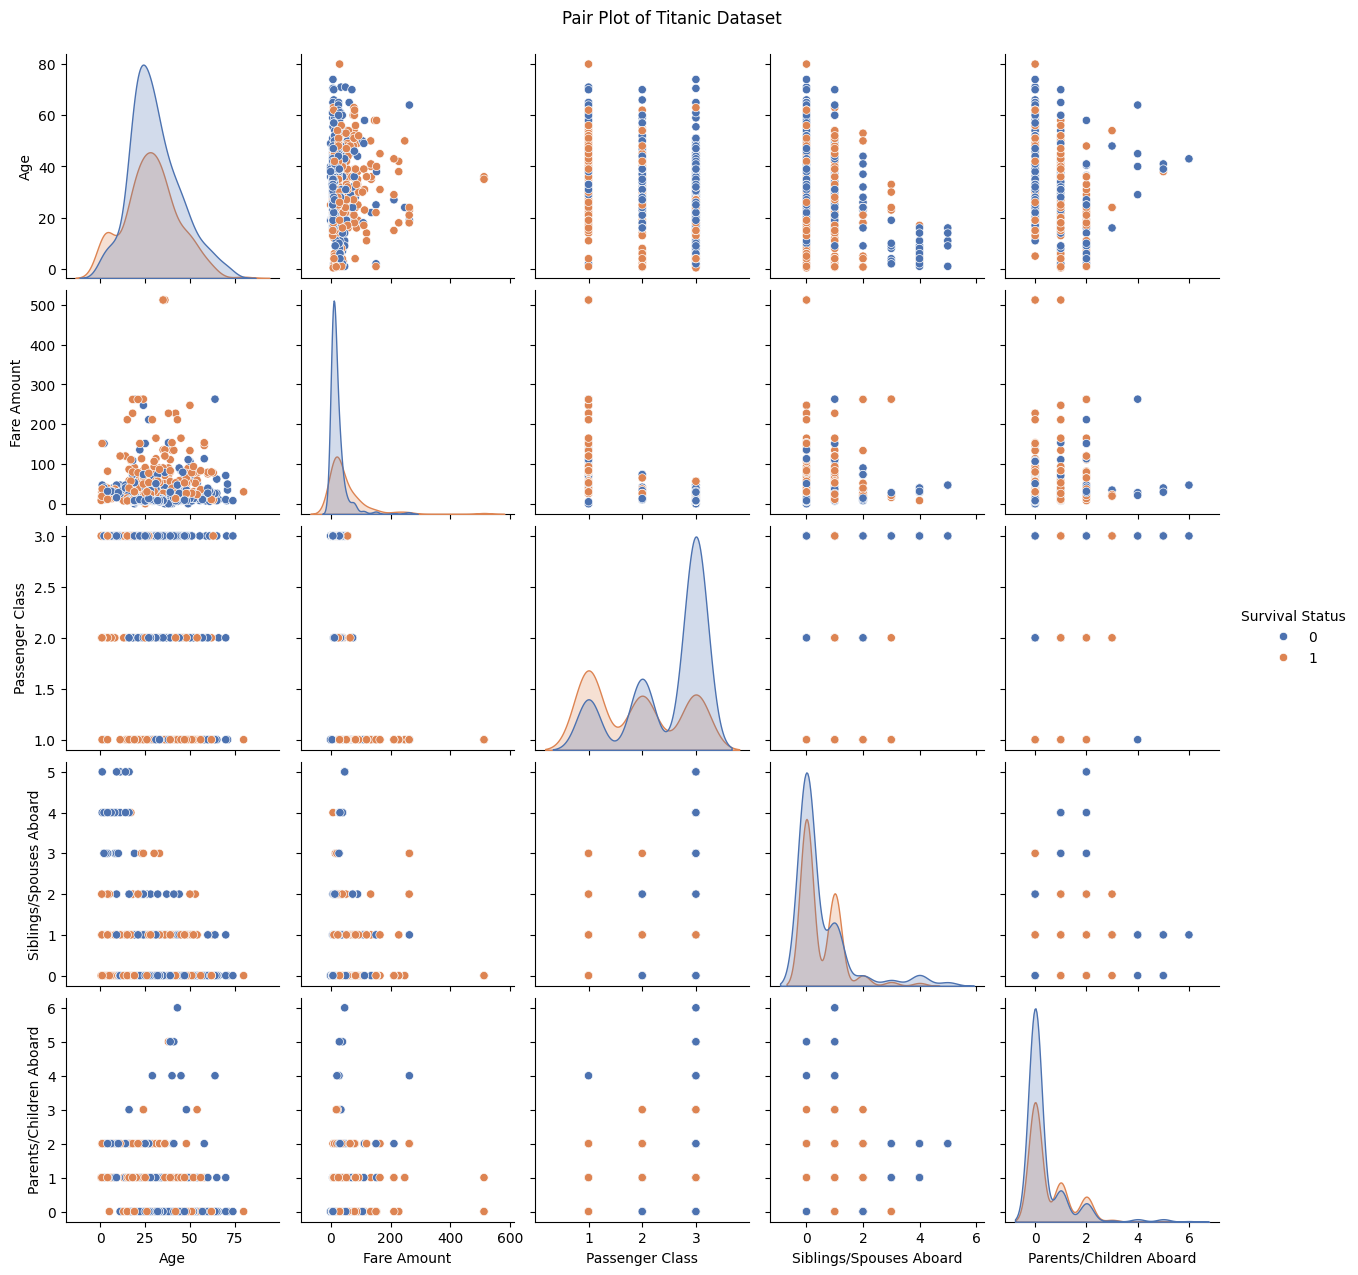

In [561]:
# Drop rows with missing values in relevant numeric columns
df = df.dropna(subset=['Age', 'Fare Amount', 'Passenger Class', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'])

# Create a pair plot
sns.pairplot(df, hue='Survival Status', vars=['Age', 'Fare Amount', 'Passenger Class', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'], palette='deep')

# Customize the plot
plt.suptitle('Pair Plot of Titanic Dataset', y=1.02)  # Adjust title position
plt.show()

##### Observations  
It seems that looking at passenger class and Parents/Children Aboard, that more people in 3rd class with both Parents and Children on board than in first or second class.

#### Correlation Heatmap

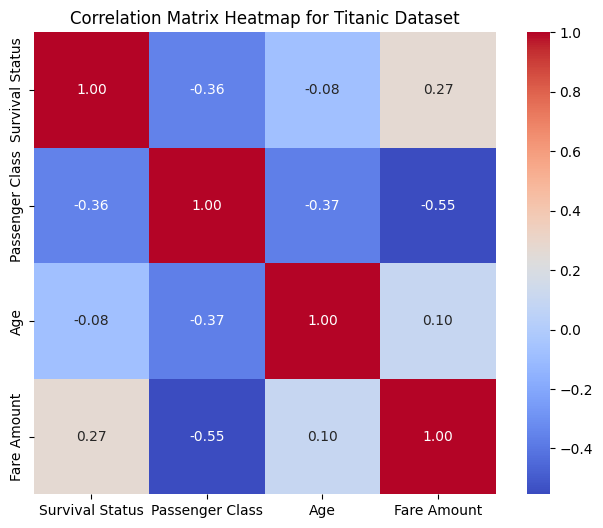

In [562]:
# Select only numeric columns relevant for correlation analysis
numeric_cols = df[['Survival Status', 'Passenger Class', 'Age', 'Fare Amount']]

# Calculate the correlation matrix
correlation = numeric_cols.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap for Titanic Dataset')
plt.show()

##### Observations  
Some possible correlations to be made from this heatmap are that the Fare Amount is correlated to Passenger class which makes perfect sense, and then there are some correlations betwen passenger class and survival as well as passenger class and age.

#### Correlation Heatmap with survival status

survived          int64
pclass            int64
sex               int64
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


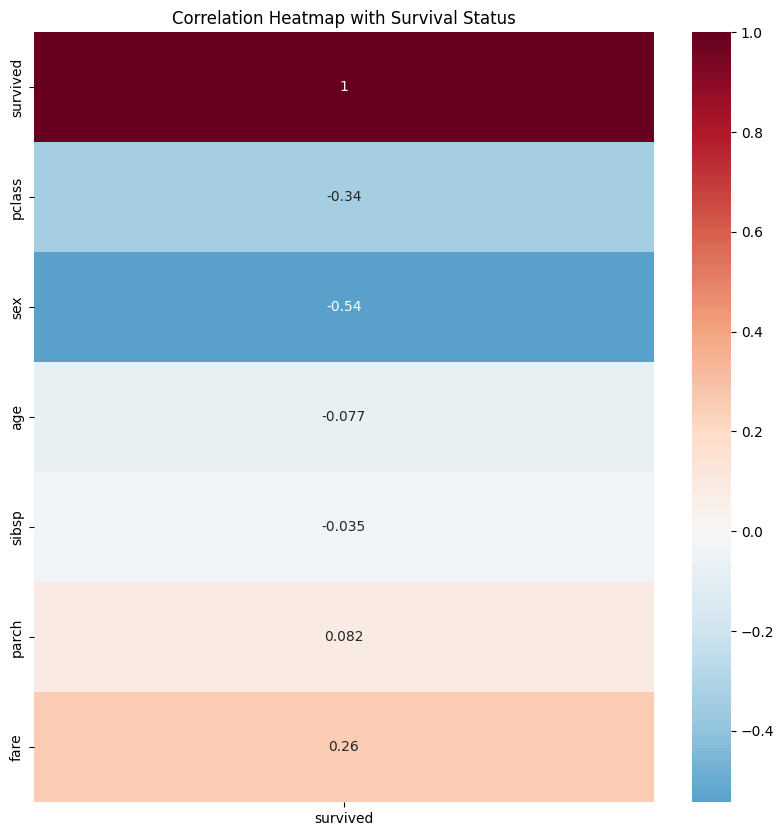

In [570]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Convert categorical variables to numeric
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Check the data types after conversion
print(df.dtypes)

# Drop any non-numeric columns before calculating the correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix using only numeric columns
correlation_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix[['survived']], cmap="RdBu_r", center=0.0, annot=True)
plt.title('Correlation Heatmap with Survival Status')
plt.show()

##### Observations  
We can easily see that both passenger class and sex are correlated with survival.

##### Bar Plot for Survival Counts by Passenger Class

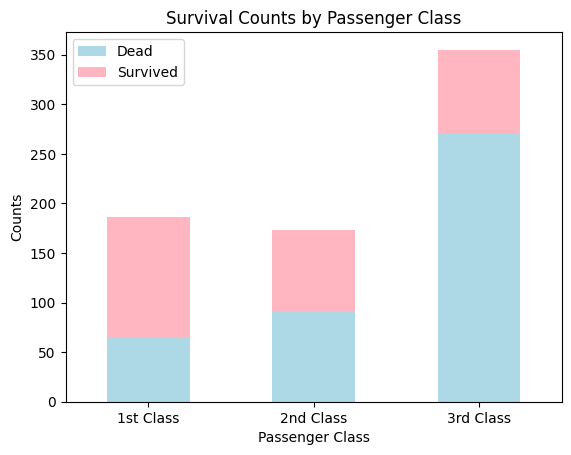

In [564]:
# Create a contingency table
contingency_titanic = df.groupby(['Passenger Class', 'Survival Status']).size().unstack()

# Rename the index to use "Survived" and "Dead"
contingency_titanic.index = ['1st Class', '2nd Class', '3rd Class']  # Rename classes
contingency_titanic.columns = ['Dead', 'Survived']  # Rename 0 and 1

# Create a stacked bar plot
titanic_barplot = contingency_titanic.plot.bar(stacked=True, 
                                               color=["lightblue", "lightpink"])

plt.ylabel("Counts")
plt.xlabel('Passenger Class')
plt.xticks(rotation=0)
plt.title('Survival Counts by Passenger Class')
plt.show()

##### Observations
We can see that there were many more 3rd class passengers onboard as well as more 3rd class passengers who did not survive.

#### Male vs. Female Survivors

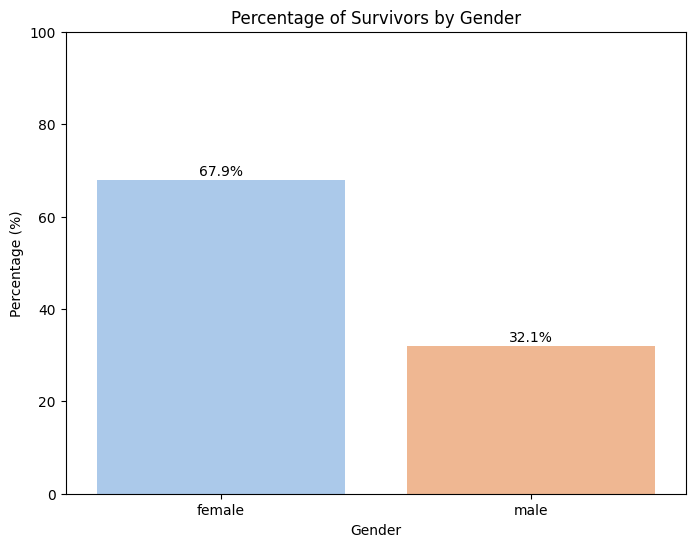

In [565]:
# Filter for survivors
survivors = df[df['Survival Status'] == 1]

# Calculate the counts of males and females among survivors
gender_counts = survivors['Sex'].value_counts()

# Convert the Series to a DataFrame for easier plotting
gender_percentages = (gender_counts / gender_counts.sum() * 100).reset_index()
gender_percentages.columns = ['Gender', 'Percentage']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', hue='Gender', y='Percentage', data=gender_percentages, palette='pastel')

# Customize the plot
plt.title('Percentage of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')

# Add percentage labels on top of the bars
for index, value in enumerate(gender_percentages['Percentage']):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center')

plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

##### Observations
It is clear that a higher percentage of females survived than men.

#### Count Plot

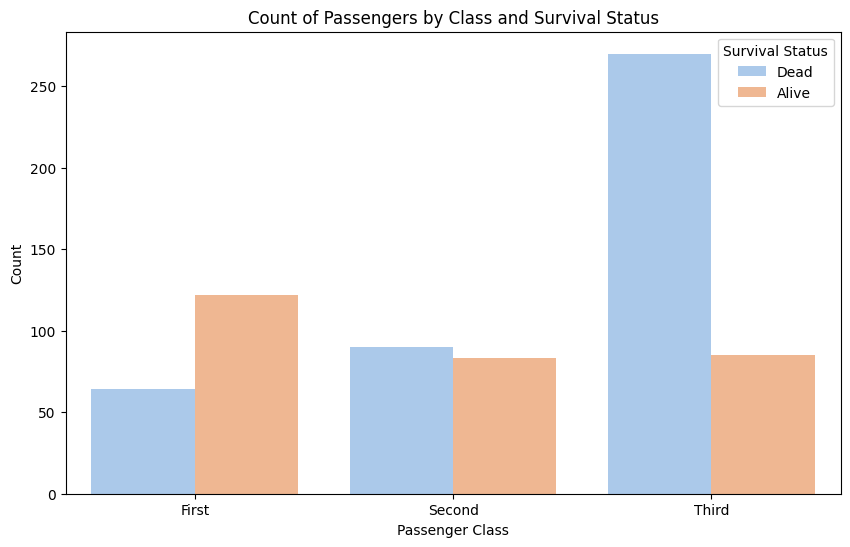

In [566]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='class', hue='Survival Status', data=df, palette='pastel')

# Customize the plot
plt.title('Count of Passengers by Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# Rename legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Dead', 'Alive'], title='Survival Status')

plt.show()

##### Observation  
It is very easy to see that there were many more third class passengers that died than the first or second class passengers.

#### Box Plot of Fare by Class and Survival
A box plot can help show the distribution of fares paid by passengers in different classes, highlighting survival status

0: Represents Did Not Survive (Dead)
1: Represents Survived (Alive)

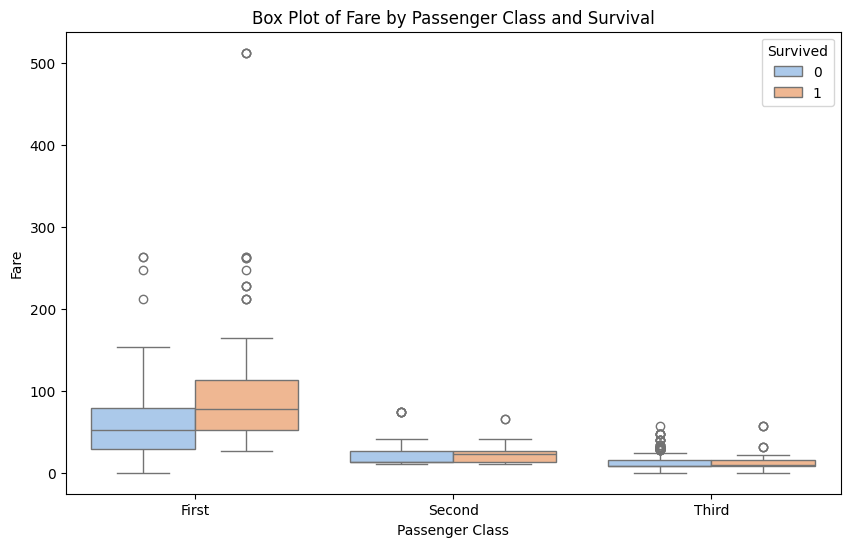

In [567]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Fare Amount', hue='Survival Status', data=df, palette='pastel')
plt.title('Box Plot of Fare by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

##### Observations 
There was more variance in fair for first class passengers than for 2nd or 3rd class passengers.  It also looks like more passengers survived in first class.

#### Violin Plot of Age by Class and Survival

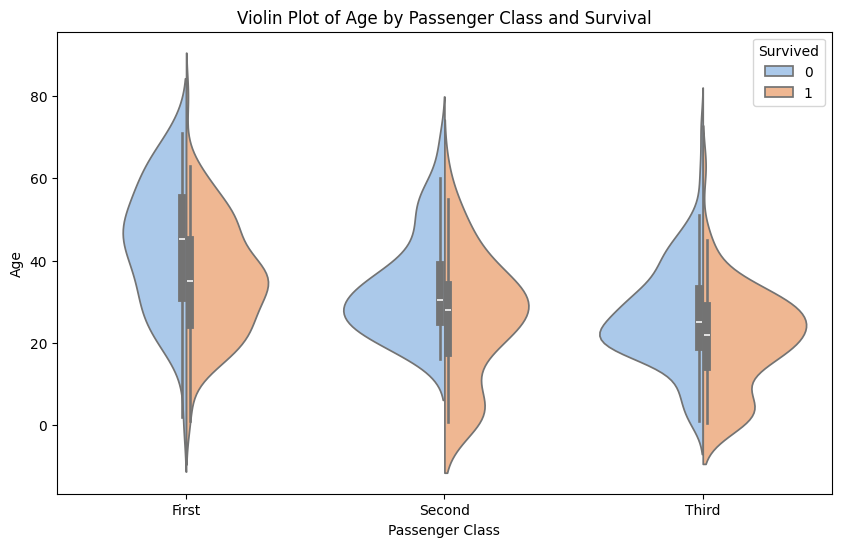

In [568]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='Age', hue='Survival Status', data=df, split=True, palette='pastel')
plt.title('Violin Plot of Age by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.show()

#### FacetGrid of Survival by Age and Class

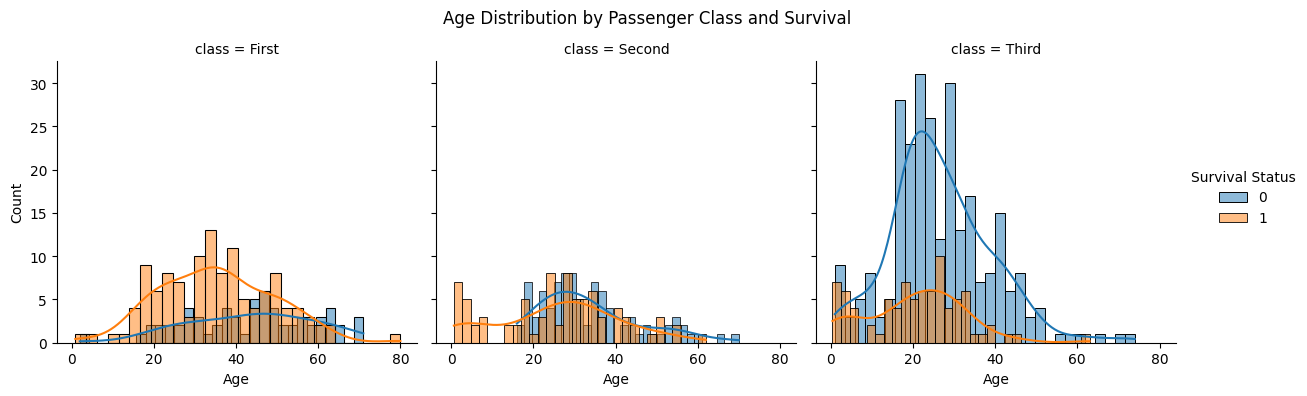

In [569]:
g = sns.FacetGrid(df, col='class', hue='Survival Status', height=4, aspect=1)
g.map(sns.histplot, 'Age', bins=30, kde=True)
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Age Distribution by Passenger Class and Survival')
plt.show()

#### Observations  
The fact that there were many more 3rd class passengers who died is very prominent in this facet grid.

#### Stacked Bar Plot

Survival Status           0   1
Passenger Class Sex            
1               female    3  82
                male     61  40
2               female    6  68
                male     84  15
3               female   55  47
                male    215  38
Survival Status                0         1
Passenger Class Sex                       
1               female  0.035294  0.964706
                male    0.603960  0.396040
2               female  0.081081  0.918919
                male    0.848485  0.151515
3               female  0.539216  0.460784
                male    0.849802  0.150198


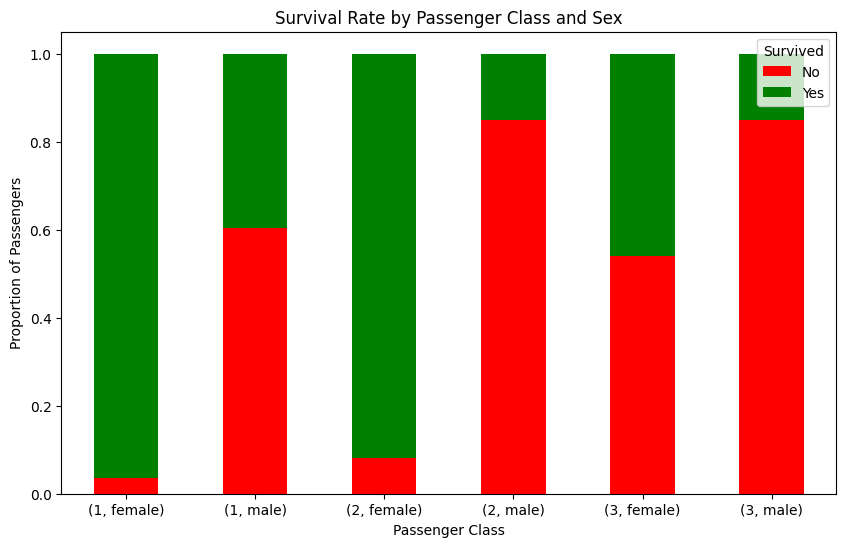

In [563]:
# Calculate survival rates by class and sex
survival_counts = df.groupby(['Passenger Class', 'Sex', 'Survival Status']).size().unstack(fill_value=0)
print(survival_counts)

# Calculate the total count of passengers in each group
total_counts = survival_counts.sum(axis=1)

# Calculate survival proportions
survival_proportions = survival_counts.div(total_counts, axis=0)
print(survival_proportions)

# Create a stacked bar plot
ax = survival_proportions.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))

# Customize the plot
plt.title('Survival Rate by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Proportion of Passengers')
plt.xticks(rotation=0)

# Set the legend with proper labels
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right')

plt.show()

##### Observations  
The stacked bar plot is one of the best visulizations of survival vs. non-survival of the titanic datset.  We can tell several things from this bar plot.  If we were to rate the groups most likely to survive to those least likely to survive, this would be the order:  
1.  First class femaies - most likely to survive  
2.  Second class females   
3.  Third class females  
4.  First class men  
5.  Second class men  
6.  Third class men  

#### Overall Observations
There are several things that are very clear after viewing the data from the Titanic dataset.  First, if you were a female, you were more liketlyl to survive.  This is due to the "women and children first" mentality of the time period.  Next, if you were a wealthier individual, you were also more likely to survive.  Third class passengers did not have even close to the survival proportion as first and second class passengers.  